In [1]:
import pandas as pd

df = pd.read_csv("Regional_Daily_Cases.csv")
df

,Date,Sweden_Total_Daily_Cases,Blekinge,Dalarna,Gotland,Gävleborg,Halland,Jämtland_Härjedalen,Jönköping,Kalmar,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra_Götaland,Örebro,Östergötland
0,2020-02-04,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-02-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-02-06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-02-07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-02-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,2021-02-07,1013,3,9,2,37,10,7,10,17,...,156,4,35,14,8,2,10,321,28,104
370,2021-02-08,1516,3,4,2,10,190,8,11,12,...,498,3,57,3,11,14,10,200,32,86
371,2021-02-09,4077,42,93,1,213,314,58,284,41,...,803,114,167,104,320,160,93,707,53,128
372,2021-02-10,4364,33,60,11,99,198,42,212,83,...,714,73,131,62,182,79,41,1070,58,123


In [53]:
dag = "2021-02-09"
df_2 = df[df["Date"]=="2021-02-09"]
print(df_2["Dalarna"].iloc[0])

93


In [148]:
import plotly.express as px
import pandas as pd

df = pd.read_csv("Regional_Daily_Cases.csv")

region = "Stockholm"
#df_Gotland = df[region]
#df_date = df["Date"][1:]

fig = px.line(df, x = 'Date', y = region, title='')
fig.show()


In [60]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt 

df = pd.read_csv("Regional_Daily_Cases.csv")
datum = df["Date"]
input_datum = input(" Ange en datum mellan 2020-02-04 och 2021-02-11!")

lista_regioner = df.columns[2:]

df_given_datum= df[df["Date"]==input_datum]
lista_cases = []
for x in regioner:
    casesPer_region = df_given_datum[x].iloc[0]
    lista_cases.append(casesPer_region)

px.pie(labels=lista_regioner,values=lista_cases,names=lista_regioner, title= f"antal sjuka i olika regioner under  och i hela sverige är # ")



In [64]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt 

df_regional_data = pd.read_csv("Regional_Totals_Data.csv")
df = pd.read_csv("Regional_Daily_Cases.csv")
datum = df["Date"]
input_datum = input(" Ange en datum mellan 2020-02-04 och 2021-02-11!")

lista_regioner = df.columns[2:]

df_given_datum= df[df["Date"]==input_datum]
lista_cases = []
for x in regioner:
    casesPer_region = df_given_datum[x].iloc[0]
    lista_cases.append(casesPer_region)

per_100k= df_regional_data["Cases_per_100k_Pop"]

fig = px.scatter( x=per_100k, y=lista_cases, hover_name=lista_regioner, title="wuuusuup")
fig.show()
#print(per_100k_lista)
#print(cases)
#hover_name="country", 

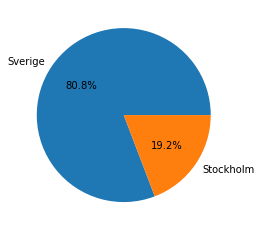

In [4]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv("Regional_Daily_Cases.csv")

df_sverige = df["Sweden_Total_Daily_Cases"].sum()
df_Stockholm = df["Stockholm"].sum()
lista = [df_sverige, df_Stockholm]
namn = "Sverige", "Stockholm"

plt.pie(lista, labels=namn,autopct='%1.1f%%')
plt.show()

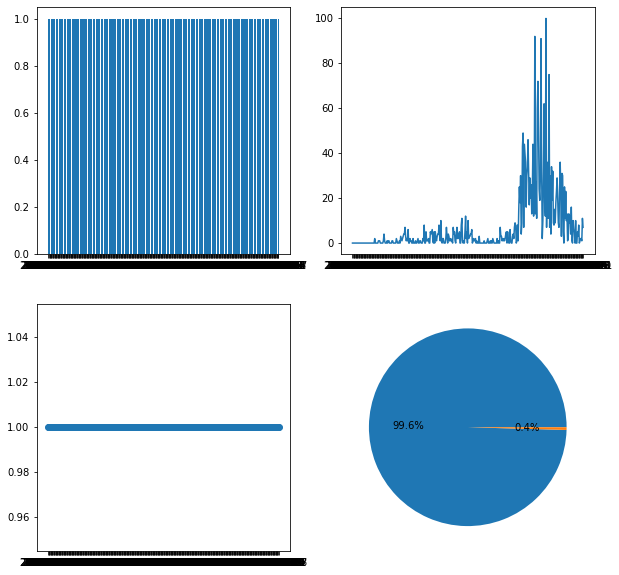

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv("Regional_Daily_Cases.csv")

df_Gotland = df["Gotland"]
df_date = df["Date"]

datum = df["Date"].value_counts()

df_sverige = df["Sweden_Total_Daily_Cases"].sum()
df_götenorg = df["Gotland"].sum()
lista = [df_sverige, df_götenorg]


fig, axs = plt.subplots(2,2, figsize=(10,10))
axs[0,0].bar(datum.keys(), datum.tolist())
axs[1,0].scatter(datum.keys(), datum.tolist())
axs[0,1].plot(df_date, df_Gotland, label="död")
axs[1,1].pie(lista,autopct='%1.1f%%')
plt.show()

<BarContainer object of 21 artists>

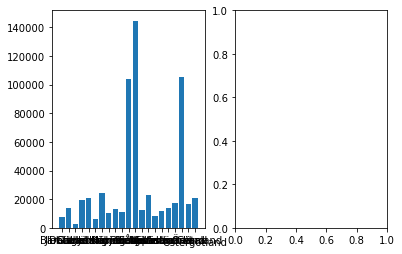

In [153]:
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns
df_h = pd.read_csv("Regional_Daily_Cases.csv")

region = "Stockholm"
dafe = df_h["Date"]

df = pd.read_csv("Regional_Totals_Data.csv")
region = df["Region"]
cases = df["Total_Cases"]
döda = df["Total_Deaths"]
gender = [df["Total_Cases"],df["Total_Deaths"]]


fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
ax1.bar(region,cases)


In [7]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=2,
)

fig.add_trace(go.Bar(y=[2, 4, 1]),
              row=1, col=1)



fig.add_trace(go.Pie(values=[2, 3, 1]),
              row=2, col=1)

fig.add_trace(go.Scatter3d(x=[2, 3, 1], y=[0, 0, 0],
                           z=[0.5, 1, 2], mode="lines"),
              row=2, col=2)

fig.update_layout(height=700, showlegend=False)

fig.show()

ValueError: Trace type 'pie' is not compatible with subplot type 'xy'
at grid position (2, 1) 

See the docstring for the specs argument to plotly.subplots.make_subplots 
for more information on subplot types

In [144]:
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt 

df = pd.read_csv("Regional_Totals_Data.csv")
region = df["Region"]
cases = df["Total_Cases"]
döda = df["Total_Deaths"]

list_döda = [m for m in döda]
list_cases = [n for n in cases]
städer = [str(l) for l in region]


fig = make_subplots(
    rows=2, cols=2,
)

fig.add_trace(
        go.Bar(
        x = städer,
        y = list_döda,
        name ="Antal döda på grund av covid-19",
        marker_color = 'rgb(55, 83, 109)')
        
        fig.add_trace(go.Bar(x=städer,
        y= list_cases,
        name ="Antal sjukdomsfall av covid-19",
        marker_color = 'rgb(26, 118, 255)'))
    row=1, col=1)

#fig.add_trace(go.Bar(y=[2, 3, 1]),
#              row=1, col=1)
#
#fig.add_trace(go.Bar(y=[2, 3, 1]),
#              row=1, col=1)
#
#fig.add_trace(go.Bar(y=[2, 3, 1]),
#              row=1, col=1)


SyntaxError: invalid syntax (<ipython-input-144-07e5c20b94c5>, line 28)